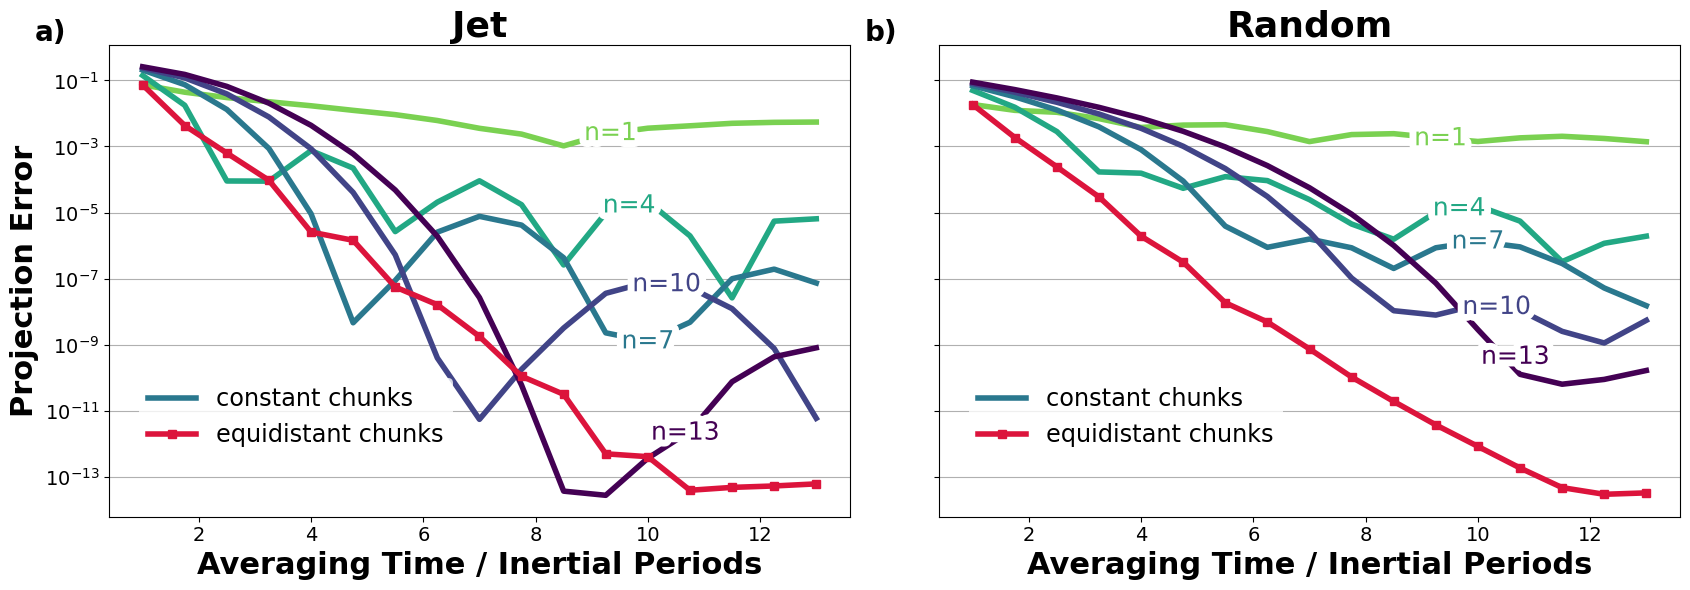

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

d_equi = xr.load_dataset("../data/geo_proj_error_equidistant_sw.nc", decode_timedelta=False)
d_con = xr.load_dataset("../data/geo_proj_error_constant_sw.nc", decode_timedelta=False)

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(17, 6), sharey=True)

colors = plt.cm.viridis_r(np.linspace(0.2, 1, len(d_con.number_chunks)))

ave_period = d_con.total_averaging_time / (2 * np.pi)

for ic, ax, label in zip(d_con.initial_condition, axs, ["a)", "b)"]):
    # plot the results of constant time chunks
    for n_ave, col in zip(d_con.number_chunks, colors):
        ax.plot(ave_period,
                d_con.sel({"initial_condition": ic,
                           "number_chunks": n_ave}).averaging_error,
                c=col, lw=4, label=f"n={n_ave.item()}",
        )

    # Create inline labels
    labelLines(ax.get_lines(), zorder=2.5, align=False, xvals=(9,11),
               fontsize=18, outline_width=10)

    # plot the results of equidistant time chunks
    ax.plot(ave_period, d_equi.sel({"initial_condition": ic}).averaging_error,
            c="crimson", lw=4, marker="s")

    # labels etc.
    ax.tick_params(labelsize=14)
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_title(ic.item().capitalize(), fontsize=26, fontweight="bold")
    ax.set_xlabel("Averaging Time / Inertial Periods", fontsize=22, fontweight="bold")

    # Create legend
    custom_lines = [Line2D([0], [0], color=colors[2], lw=4),
                    Line2D([0], [0], color="crimson", lw=4, marker="s")]
    leg = ax.legend(custom_lines,
                    ["constant chunks", "equidistant chunks"],
                    bbox_to_anchor=(0.48, 0.32),
                    frameon=True,
                    prop={"size":"xx-large"})
    leg.get_frame().set_linewidth(0)
    leg.get_frame().set_facecolor("white")

    # Create a, b labels
    ax.text(-0.1, 1.01, label, transform=ax.transAxes,
            fontsize=20, fontweight="bold")

axs[0].set_ylabel("Projection Error", fontsize=22, fontweight="bold")
plt.savefig("../figures/averaging_error.png", dpi=200)